# Upper Confidence Bound (UCB)<hr>

In [16]:
# importing dataset

import pandas as pd

dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


### Implementing UCB

In [17]:
from math import sqrt,log

N = len(dataset) # Total records
d = len(dataset.values[0]) # No. of columns
ads_selected=[]
sum_rewards=[0]*d
times_selected=[0]*d

In [18]:
for n in range(N):
    ad_select = 0
    max_upper_bound = 0
    for i in range(d):
        # Skip computation till every ad gets selected once
        if n<d:
            ad_select = n
            break
        avg_rewards = sum_rewards[i]/times_selected[i]
        delta = sqrt(3/2 * log(n+1)/times_selected[i])
        upper_bound = avg_rewards + delta
        if upper_bound>max_upper_bound:
            ad_select=i
            max_upper_bound=upper_bound
            
    ads_selected.append(ad_select)
    times_selected[ad_select]+=1
    reward = dataset.values[n,ad_select]
    sum_rewards[ad_select]+= reward

print(sum(sum_rewards))


2178


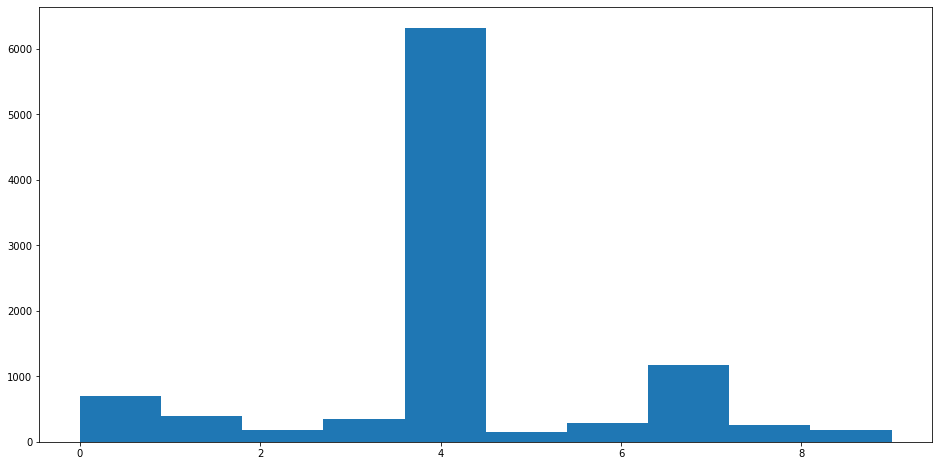

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize']=(16,8)
plt.hist(ads_selected)
plt.show()